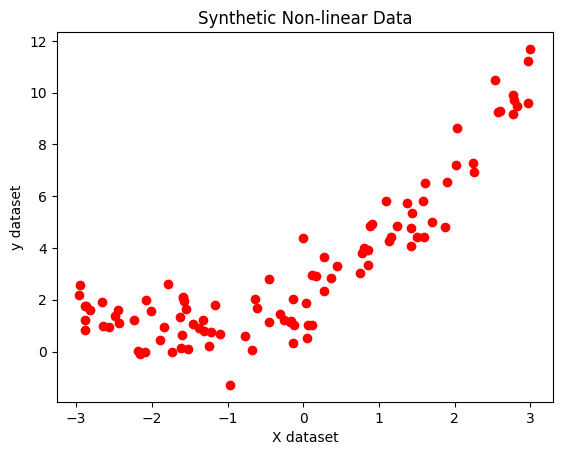

0.6708905407413703


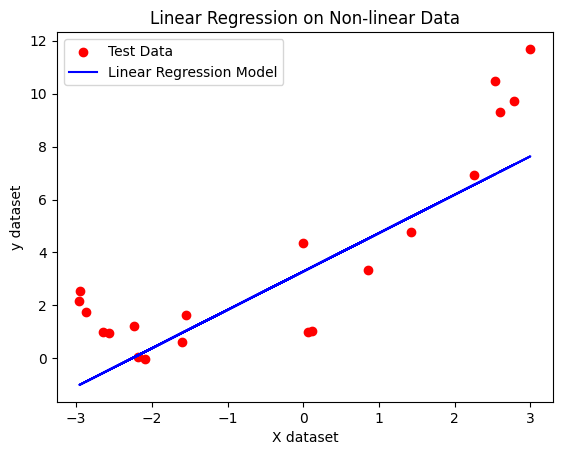

0.9374154928793191
[[0.         1.47266539 0.45901736]]
[2.06745529]
[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00]
 [ 1.00000000e+00 -2.93939394e+00  8.64003673e+00]
 [ 1.00000000e+00 -2.87878788e+00  8.28741965e+00]
 [ 1.00000000e+00 -2.81818182e+00  7.94214876e+00]
 [ 1.00000000e+00 -2.75757576e+00  7.60422406e+00]
 [ 1.00000000e+00 -2.69696970e+00  7.27364555e+00]
 [ 1.00000000e+00 -2.63636364e+00  6.95041322e+00]
 [ 1.00000000e+00 -2.57575758e+00  6.63452709e+00]
 [ 1.00000000e+00 -2.51515152e+00  6.32598714e+00]
 [ 1.00000000e+00 -2.45454545e+00  6.02479339e+00]
 [ 1.00000000e+00 -2.39393939e+00  5.73094582e+00]
 [ 1.00000000e+00 -2.33333333e+00  5.44444444e+00]
 [ 1.00000000e+00 -2.27272727e+00  5.16528926e+00]
 [ 1.00000000e+00 -2.21212121e+00  4.89348026e+00]
 [ 1.00000000e+00 -2.15151515e+00  4.62901745e+00]
 [ 1.00000000e+00 -2.09090909e+00  4.37190083e+00]
 [ 1.00000000e+00 -2.03030303e+00  4.12213039e+00]
 [ 1.00000000e+00 -1.96969697e+00  3.87970615e+00]
 [ 1.00000000

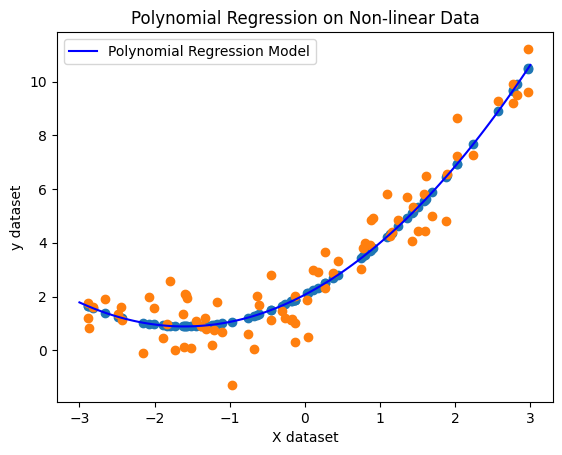

In [12]:
# 1️⃣ Import Libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
# Generate synthetic data for a non-linear relationship
# X: 100 random numbers between -3 and 3
X = 6 * np.random.rand(100, 1) - 3

# y: A quadratic function of X with added random noise
# The true relationship is y = 0.5*X^2 + 1.5*X + 2
# np.random.randn(100, 1) adds Gaussian noise to simulate real-world data
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
# this is quadratic Equation used y=0.5*X^2 + 1.5*X + 2+outliers

#3️⃣ Visualize the Data
plt.scatter(X, y, color='red')
plt.title("Synthetic Non-linear Data")
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.show() #🔍 Clearly shows non-linear (curved) trend

# 4️⃣ Split the Data

#sklearn.model_selection is a module in the scikit-learn library 
# that provides tools for splitting datasets into training and testing sets
#train_test_split is a function that splits arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
#random_state=42 is used for reproducibility 
# which means that every time you run the code, you will get the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Train Simple Linear Regression
#sklearn.linear_model is a module in the scikit-learn library
# that provides classes and functions for linear models
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Train the model #Output: LinearRegression()

# 6️⃣ Evaluate Linear Regression

#sklearn.metrics is a module in the scikit-learn library
# that provides functions to measure the performance of machine learning models
from sklearn.metrics import r2_score
y_pred = model_lr.predict(X_test)
print(r2_score(y_test, y_pred)) #Output: 0.6998826693868343 #⚠️ Expected to show low R² score

#Let Visualize the Linear Regression Model
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='blue', label='Linear Regression Model')
plt.title("Linear Regression on Non-linear Data")
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.legend()
plt.show() #🔍 The linear regression line does not fit the data well

# 7️⃣ Apply Polynomial Transformation
#sklearn.preprocessing is a module in the scikit-learn library
# that provides functions to preprocess data
from sklearn.preprocessing import PolynomialFeatures
#we take degree=2 because we know the true relationship is quadratic
poly = PolynomialFeatures(degree=2, include_bias=True)
#fit_transform: Fit to data, then transform it
#transform: Transform the data to polynomial features   
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#print(X_train_poly) #[[ 1.00000000e+00  3.07906486e-01  9.48064041e-02]]
#print(X_test_poly)  # [[ 1.          2.97655342  8.85987025]]

from sklearn.metrics import r2_score
# Train the model on polynomial features
regression = LinearRegression()
regression.fit(X_train_poly, y_train) #Output: LinearRegression()
# Predict on the test set
y_pred_poly = regression.predict(X_test_poly)
# Calculate R² score
print(r2_score(y_test, y_pred_poly)) #Output: 0.9078907863660846 #✅ High R² score
print(regression.coef_) #Output: [[0.1.46 0.42 ]] #✅ Coefficients of the polynomial regression
print(regression.intercept_) #Output: [2.191] #✅ Intercept of the polynomial regression
# 8️⃣ Visualize Polynomial Regression
plt.scatter(X_train, regression.predict(X_train_poly)) # Plot the polynomial regression line
plt.scatter(X_train,y_train) # Plot the training data points

#Prediction of new dataset
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # Generate new X values for smooth curve
X_new_poly = poly.transform(X_new) # Transform new X values to polynomial features
print(X_new_poly) #Output: [[ 1.         -2.99999999  8.99999997] [ 1.         -2.93939394  8.62903226] [ 1.         -2.87878788  8.28735632] ...]

Y_new = regression.predict(X_new_poly) # Predict y values for new X values
plt.plot(X_new, Y_new, color='blue', label='Polynomial Regression Model') # Plot the polynomial regression line
plt.title("Polynomial Regression on Non-linear Data")
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.legend()
plt.show() #🔍 The polynomial regression line fits the data well